#  Superdense Coding with Qiskit

This notebook demonstrates **Superdense Coding**, a quantum communication protocol that allows two classical bits to be transmitted using only one qubit, leveraging quantum entanglement. This implementation uses Qiskit for simulation.

---


In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


## Step 1: Creating a Bell State

We start by creating an entangled pair (Bell state) using the Hadamard and CNOT gates. This entangled pair is shared between Alice and Bob.


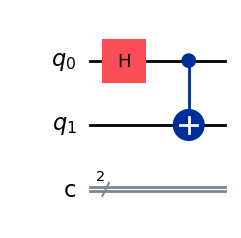

In [59]:
# Creating a 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

# Step 1: Create a Bell pair
qc.h(0)       # Apply Hadamard on qubit 0 (Alice's qubit)
qc.cx(0, 1)   # Apply CNOT with control qubit 0 and target qubit 1 (Bob's qubit)
fig = qc.draw(output='mpl')
fig.savefig("bell_state_diagram.png")

##  Step 2: Encoding the Message (By Alice)

Depending on the classical message (00, 01, 10, 11), Alice applies the following transformations on her qubit:

- 00 → Identity (I)
- 01 → Pauli-X (X)
- 10 → Pauli-Z (Z)
- 11 → Pauli-Z followed by Pauli-X (ZX)

These operations encode 2 classical bits into 1 qubit.


In [25]:
# Function to encode classical 2-bit message into Alice's qubit
def encoding_msg(qc, message):
    if message == "00":
        qc.id(0)  # Identity (does nothing)
    elif message == "01":
        qc.x(0)  # Pauli-X
    elif message == "10":
        qc.z(0)  # Pauli-Z
    elif message == "11":
        qc.z(0)
        qc.x(0)  # Pauli-Z then Pauli-X
    else:
        print("Invalid message: defaulting to '00'")


##  Step 3: Decoding the Message (By Bob)

After Alice sends her qubit to Bob, he performs the reverse entangling operations to decode the original 2-bit message:

1. Apply CNOT gate (qubit 0 → 1)
2. Apply Hadamard gate to qubit 0
3. Measure both qubits


In [28]:
# Function to decode the message on Bob's side
def decoding_msg(qc):
    qc.cx(0, 1)          # Reverse entanglement
    qc.h(0)              # Apply Hadamard
    qc.measure([0, 1], [0, 1])  # Measure both qubits


##  Step 4: Run Superdense Coding Protocol

This function performs the full superdense coding simulation:

- Creates a new Bell state
- Encodes the message using Alice's operations
- Decodes using Bob's operations
- Simulates and visualizes the result


In [69]:
def run_superdense(message):
    qc = QuantumCircuit(2, 2)
    
    # Step 1: Create entangled Bell pair
    qc.h(0)
    qc.cx(0, 1)
    
    # Step 2: Encode message
    encoding_msg(qc, message)
    
    # Step 3: Decode message
    decoding_msg(qc)
    
    # Step 4: Simulate
    simulator = Aer.get_backend("qasm_simulator")
    transpile_circuit = transpile(qc, simulator)
    job = simulator.run(transpile_circuit)
    results = job.result()
    counts = results.get_counts()
    
    # Step 5: Visualize
    print(f"Message sent by Alice: {message}")
    %matplotlib inline
    figure = qc.draw(output='mpl')
    figure.savefig(f"circuit_{message}.png")
    graphfig = plot_histogram(counts)
    graphfig.savefig(f"histogram_{message}.png")
    plt.show()


##  Understanding Qiskit's Bit Order: MSB to LSB

Qiskit displays measurement results **from the Most Significant Bit (MSB) to the Least Significant Bit (LSB)**. This means:

- **Qubit 1** (second qubit) is shown on the **left**
- **Qubit 0** (first qubit) is shown on the **right**

### Why This Happens:
This is not an error—Qiskit follows classical computing standards for bit order. In a 2-qubit system, if:
- Qubit 0 = 1
- Qubit 1 = 0  
Then Qiskit will display the output as **`10`**, not `01`.

###  How to Read It:
- Just remember: **Left bit = Qubit 1**, **Right bit = Qubit 0**
- If needed, **reverse the output** for logical comparison with your intended message.

> 💡 Tip: Always interpret results in the order `qubit1 → qubit0` to avoid confusion.


##  Test the Protocol for All 2-bit Messages


Message sent by Alice: 00


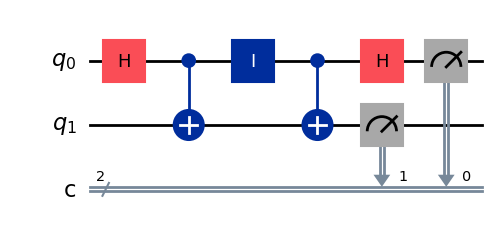

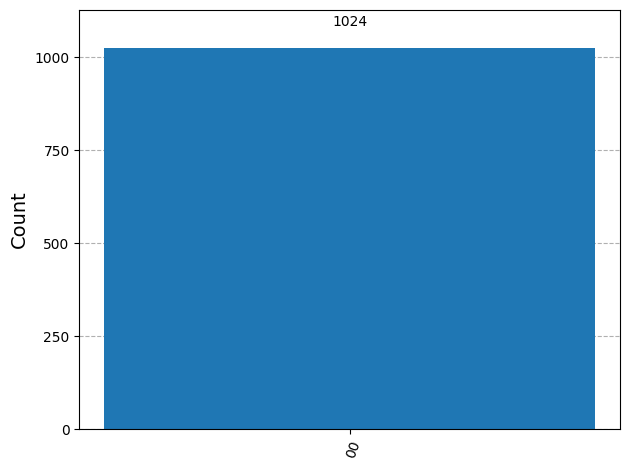

Message sent by Alice: 01


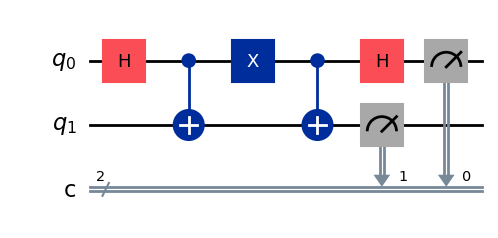

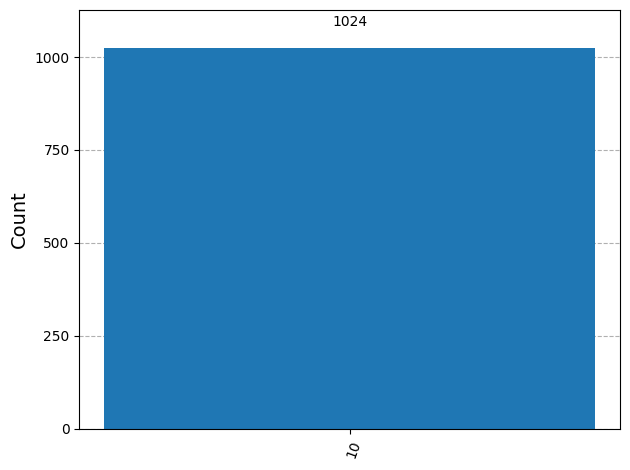

Message sent by Alice: 10


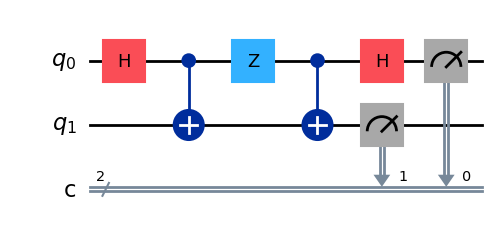

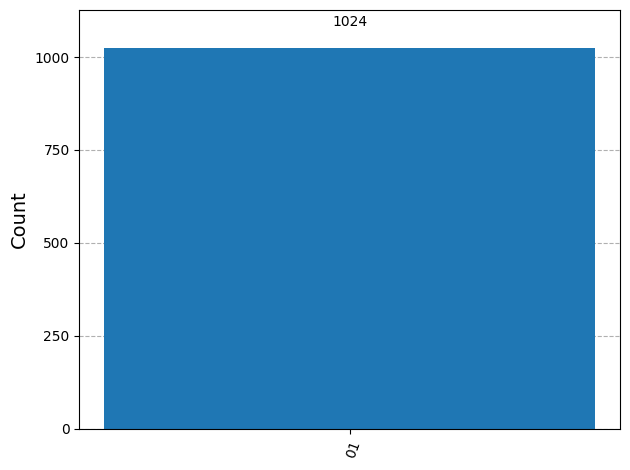

Message sent by Alice: 11


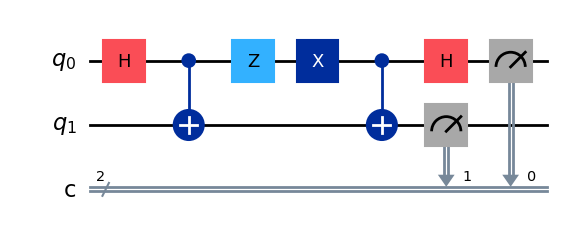

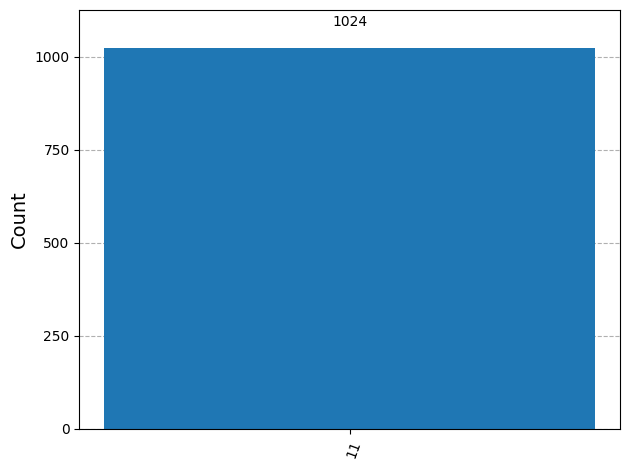

In [73]:
run_superdense('00')
run_superdense('01')
run_superdense('10')
run_superdense('11')
